## Chapter 1: 多項式曲線Fitting

- カバー範囲：P4~P11


In [488]:
## import
import numpy as np
from numpy.polynomial import polynomial as P
import matplotlib.pyplot as plt
import warnings

## plot setting
plt.rcParams['font.family'] = 'Meiryo'

In [489]:
## seed
np.random.seed(1212)

#### Problem 1: Simulationデータの生成

$(x_i, y_i)$からなるデータがN = 10個の観測値からなるとします. 
$(x_i, y_i)$はi.i.dに以下のようなデータ生成過程に基づくとします

$$
\begin{align*}
y_i &= \sin(2\pi x_i) + \epsilon_i\\
\epsilon_i &\sim N(0, 1/16)\\
x_i &\sim Uniform(0, 1)
\end{align*}
$$

このデータ生成規則に基づくデータを作成せよ.


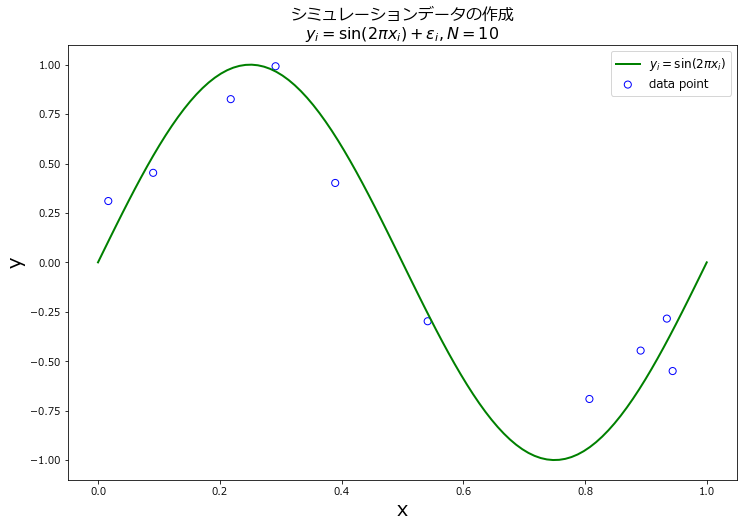

In [490]:
### noiseありsimulation data生成関数
def true_func(x):
    return np.sin(2 * np.pi * x)

def generate_data(N):
    epsilon = np.random.normal(0, 0.25, N)
    x = np.random.uniform(0, 1, N)
    y = true_func(x) + epsilon

    return x, y, epsilon


## simulationデータ生成
X, y, error = generate_data(N = 10)

## 正解曲線図示用データ生成
x_range = np.linspace(0,1,100)
y_true = true_func(x_range)

## 可視化
fig,ax = plt.subplots(figsize=(12,8))
ax.scatter(X, y, label = 'data point', facecolor="none", s= 50, edgecolor="b")
ax.plot(x_range, y_true, color='green', lw = 2, label = '$y_i = \sin(2\pi x_i)$')
ax.set_title('シミュレーションデータの作成\n$y_i = \sin(2\pi x_i) + \epsilon_i, N = 10$', fontsize=16)
ax.set_xlabel('x', fontsize=20)
ax.set_ylabel('y', fontsize=20)
ax.legend(fontsize = 12);


#### Problem 2-1(演習問題1-1): 多項式曲線Fitting

機械学習における回帰問題の文脈のトピックの一つに、「（ノイズが混じった）有限個のデータポイントからなるデータから、どのようにして汎化可能な形で規則を学習するか？」という問題があります. 学習例の一つとしての多項式曲線Fittingを以下確認します.

Problem 1のsimulationデータに対して以下の多項式を用いてFittingを行うことを考えます. 

$$
\hat y(x, \mathbf w^M) = \sum_{j=0}^M w_j x^j\tag{1.1}
$$

- $\widehat y(x, \mathbf w)$: $x$が与えられたときの$y$の予測値
- $\mathbf w^M$: 多項式係数、Mのオーダーまでの係数ベクトル, 推定したいパラメーター


まず一旦、(1.1)に基づき、学習データについてMMSE(minimum mean squared error)を満たす形で$\mathbf w^M$を推定するとします.
このときの$\hat{\mathbf w^M}$を$y,x$の関数で表わせ


> 解答

$$
\begin{align*}
X &= (X_1, \cdots, X_N)^T, \ \ \text{ where } X_i = (x^1_i, \cdots, x^M_i)^T\\
Y &= (y_1, \cdots, y_N)^T
\end{align*}
$$

と表現します. すると、(1.1)に基づくとモデルは以下のように表されます

$$
Y = X\mathbf w^M + \text{error}
$$

MMSEを満たす形でパラメーターを推定するので

$$
\widehat{\mathbf w^M} = \arg\min \frac{1}{N}(Y - X\mathbf w^M)^T(Y - X\mathbf w^M) \tag{1.2}
$$

(1.2)の左辺について、展開し整理すると

$$
Y^TY - 2(\mathbf w^M)^TX^TY + (\mathbf w^M)^TX^TX\mathbf w^M \tag{1.3}
$$

(1.3)を$\mathbf w^M$についてFOCをとると

$$
\begin{align*}
X^TY &= X^TX\widehat{\mathbf w^M}\\
\widehat{\mathbf w^M} &= (X^TX)^{-1}X^TY\\
&= \sum_{i=1}^N (X_iX_i^T)^{-1}\sum_{i=1}^N(X_iy_i)\tag{1.4}
\end{align*}
$$

また(1.4)より

$$
\sum_i X_iy_i = \sum X_iX_i^T\widehat{\mathbf w^M}
$$

なので

$$
\begin{align*}
\sum_{i=1}^Nx^j_iy_i &= \sum_{a=1}^M\sum_{i=1}^Nx^j_ix^a_i\hat w_a\\
&= \sum_{a=1}^M\sum_{i=1}^Nx^{j+a}_i\hat w_a\\
\end{align*}
$$





#### Problem 2-2: オーダーMの水準ごとの比較

推定式(1.1)についてM = (0, 1, 3, 9)でそれぞれパラメーターを推定し、$y_i$の推定値をplotせよ.

> 解答

ポイントとしては、今回の学習データは N = 20なので、M = 19だと自由度が低く、学習データの当てはまりは良いが汎化性能に乏しい = overfittingしていることを確認することです.


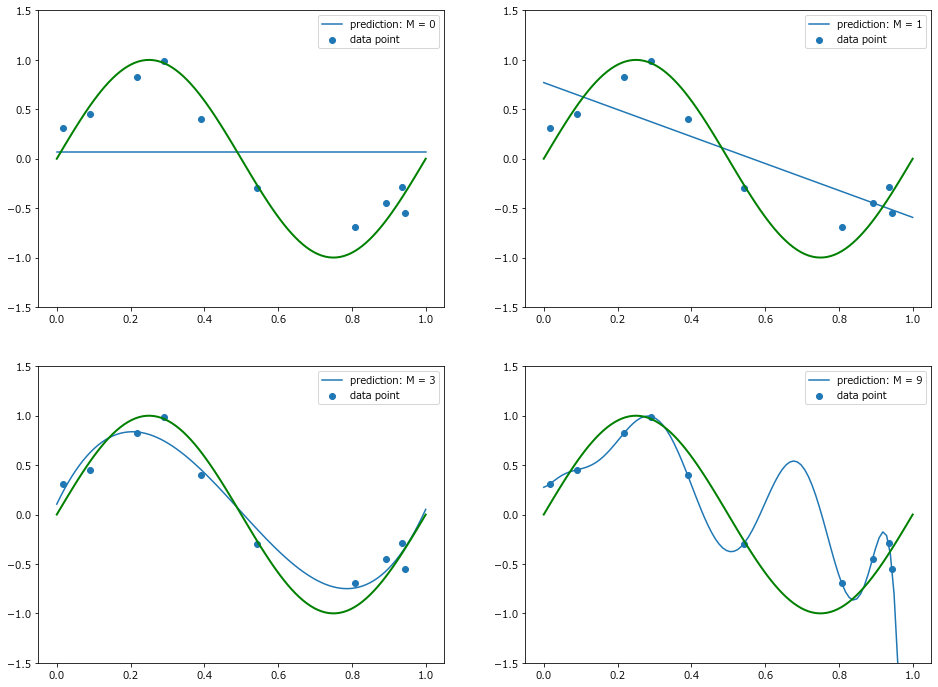

In [491]:
## setting parameters
M_range = np.array((0, 1, 3, 9))
x_range = np.linspace(0, 1, 100)
y_true = true_func(x_range)

## plot
fig, axs = plt.subplots(2, 2, figsize = (16, 12))

for ax_index, m in enumerate(M_range):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        w = np.poly1d(np.polyfit(x=X,y=y,deg=m))
    y_pred = w(x_range)

    i, j = ax_index//2, ax_index % 2
    ax = axs[i, j]
    ax.plot(x_range, y_pred, label = 'prediction: M = {}'.format(m))
    ax.scatter(X, y, label = 'data point')
    ax.plot(x_range, y_true, color='green', lw = 2)
    ax.set_ylim(-1.5,1.5)
    ax.legend()
plt.show();

#### Probelm 2-3: オーダーMの水準に応じた汎化性能の評価

Problem 2-2の設定の下、オーダーMの水準に応じた汎化性能の評価したいとします.
汎化性能評価の指針としては以下：

- 学習データとは別に100個のdata pointからなるテストデータを生成
- 学習データのデータポイントは10個とする
- テストデータに対して予測の精度を計算する
- 予測の精度はRMSEとする
- Mは0,1,2,3...,9とする

> 解答

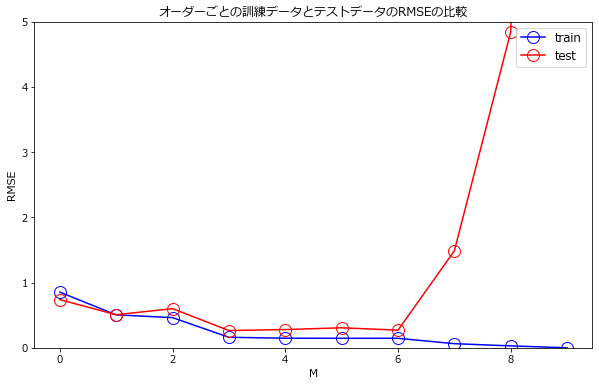

In [492]:
### RMSE計算関数
def calculate_rmse(target, pred):
    return np.sqrt(np.mean((target - pred) ** 2))


###訓練/テストデータの生成
X, y, error = generate_data(N = 110)
X_train, X_test = X[:10], X[10:]
y_train, y_test = y[:10], y[10:]


###RMSEの計算
M_range = np.arange(0,10)
test_evel_rmse = np.empty(len(M_range))
train_evel_rmse = np.empty(len(M_range))

for array_index, m in enumerate(M_range):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore', np.RankWarning)
        w = np.poly1d(np.polyfit(x=X_train,y=y_train,deg=m))
    y_pred_test, y_pred_train = w(X_test), w(X_train)
    test_evel_rmse[array_index] = calculate_rmse(y_test, y_pred_test)
    train_evel_rmse[array_index]  = calculate_rmse(y_train, y_pred_train)

## plot
fig, ax = plt.subplots(figsize = (10, 6))

ax.plot(M_range 
        ,train_evel_rmse
        ,color='b'
        ,marker='.'
        ,linestyle='solid'
        ,mec='b'
        ,markersize=24
        ,markerfacecolor='None'
        ,label='train')
ax.plot(M_range 
        ,test_evel_rmse
        ,color='r'
        ,marker='.'
        ,linestyle='solid'
        ,mec='r'
        ,markersize=24
        ,markerfacecolor='None'
        ,label='test')
ax.set_xlabel('M', fontsize=11)
ax.set_ylabel('RMSE', fontsize=11)
ax.set_ylim(0,5)
ax.set_title('オーダーごとの訓練データとテストデータのRMSEの比較')
ax.legend(fontsize=12);

> REMARKS

- M = 0ではtrain loss > test_loss担ってしまっているが、学習モデルがろくに学習していない & trainデータのほうが分散が大きい傾向があるといった理由で発生してます
- M = 9ではtrainではすべてのdata pointにfitとする予測値を出力するのでRMSEが0になる一方、過学習を起こしているためtestデータにおけるRMSEは大きくなっている
- 多項式曲線Fittingにおいて過学習を防ぐ一つの手段として学習データを増やすが挙げられたりしますが、ここでの説明は割愛します.


#### Problem 3-1: Ridge Regression

過学習の問題を制御する方法の一つとしてRegularization(正則化)があります. 正則化の一例として、loss functionにpenaltyを付与するRidge Regressionをここでは考えます.

Ridge regessionではloss functionを以下のように定義します:

$$
\mathbf w_{ridge} = \arg\min(Y-X\mathbf w)^T(Y-X\mathbf w) + \lambda \|\mathbf w\|^2\tag{1.5}
$$

このときの$\mathbf w_{ridge}$を$y,x$の関数で表わせ


> 解答

(1.5)を$\mathbf w$でFOCをとると

$$
\begin{align*}
- &X^TY + X^TX\mathbf w_{ridge} + \lambda \mathbf w_{ridge} = 0\\
&\Rightarrow \mathbf w_{ridge} = (X^TX + \lambda I_k)^{-1}X^TY\tag{1.6}
\end{align*}
$$

> REMARKS

- 係数$\lambda$は正則化項とMSEの項との相対的重要度を調整していると解釈されます
- (1.6)に着目すると$X^TX$に対角要素に$\lambda$を加えているので、$X^TX$が特異に近いとき（多重線形性問題に直面するとき）にも対策として用いられます
- 統計学では縮小推定(shrinkage)ともいわれます
- 自明ですが、このestimatorはunbiasedではないです



#### Problem 3-2: Polynominal Fitting with Ridge Regression

上述の例で$M = 9$でのridge penaltyに応じたfittingを推定します. $\log \lambda = -18, 0$のそれぞれの水準で推定し、予測精度及び汎化性能を確認せよ

> 解答

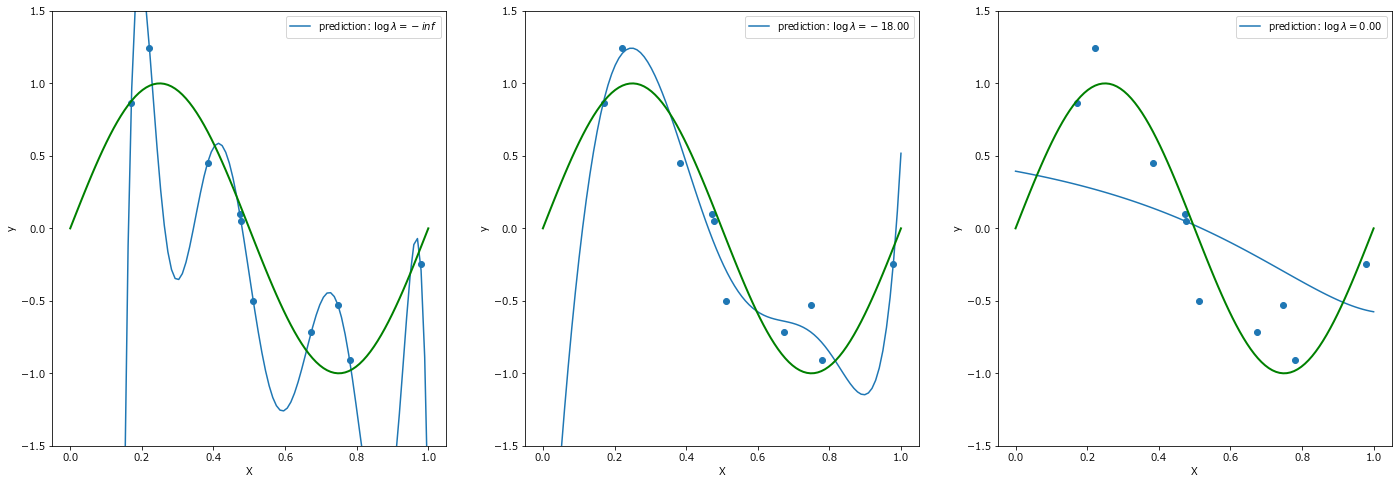

In [493]:
### ridge estimator
def estimate_ridge(y, X, penalty=0):
    mat_xy = X.T @ y
    mat_xx = X.T @ X
    mat_penalty = penalty * np.identity(mat_xx.shape[0])
    inv_mat = np.linalg.inv(mat_xx + mat_penalty)

    return inv_mat @ mat_xy


###訓練/テストデータの生成
X, y, error = generate_data(N = 110)
X_ridge = np.empty((110, 9))
lambda_range = [0, np.exp(-18), 1]

for i in range(9):
    X_ridge[:,i] = X ** i

X_train, X_test = X_ridge[:10, :], X_ridge[10:, :] ## train-test split
y_train, y_test = y[:10], y[10:]


### 正解曲線図示用データ生成
x_range = np.linspace(0,1,100)
y_true = true_func(x_range)


###ridge regression
fig, axs = plt.subplots(1, 3, figsize = (24, 8))

for ax_index, lambda_penalty in enumerate(lambda_range):
    w_ridge = estimate_ridge(y_train, X_train, lambda_penalty)
    y_pred = np.polyval(w_ridge[::-1], x_range)
    y_pred_test, y_pred_train = np.polyval(w_ridge[::-1], X_test), np.polyval(w_ridge[::-1], X_train)

    ax = axs[ax_index]
    ax.plot(x_range, y_pred, label = 'prediction: $\log\lambda= {:.2f}$'.format(np.log(lambda_penalty) if lambda_penalty > 0 else -np.inf))
    ax.scatter(X[:10], y_train)
    ax.plot(x_range, y_true, color='green', lw = 2)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.set_ylim(-1.5,1.5)
    ax.legend()
plt.show();

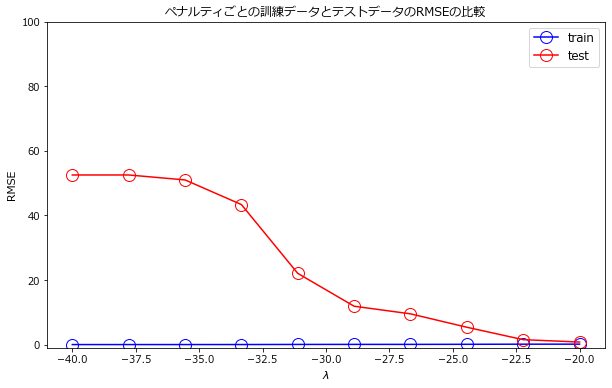

In [494]:
lambda_range = np.linspace(-40, -20, 10)


###plot test train RMSE
test_evel_rmse = np.empty(len(lambda_range))
train_evel_rmse = np.empty(len(lambda_range))
fig, ax = plt.subplots(figsize = (10, 6))

for array_index, lambda_penalty in enumerate(lambda_range):
    w_ridge = estimate_ridge(y_train, X_train, np.exp(lambda_penalty))
    y_pred_test, y_pred_train = np.polyval(w_ridge[::-1], X[10:]), np.polyval(w_ridge[::-1], X[:10])
    test_evel_rmse[array_index] = calculate_rmse(y_test, y_pred_test)
    train_evel_rmse[array_index]  = calculate_rmse(y_train, y_pred_train)

ax.plot(lambda_range 
        ,train_evel_rmse
        ,color='b'
        ,marker='.'
        ,linestyle='solid'
        ,mec='b'
        ,markersize=24
        ,markerfacecolor='None'
        ,label='train')
ax.plot(lambda_range 
        ,test_evel_rmse
        ,color='r'
        ,marker='.'
        ,linestyle='solid'
        ,mec='r'
        ,markersize=24
        ,markerfacecolor='None'
        ,label='test')
ax.set_xlabel('$\lambda$', fontsize=11)
ax.set_ylabel('RMSE', fontsize=11)
ax.set_ylim(-1,100)
ax.set_title('ペナルティごとの訓練データとテストデータのRMSEの比較')
ax.legend(fontsize=12);